# 3. 비지도 학습과 데이터 전처리

### 3.4 차원 축소, 특성 추출, 매니폴드 학습

- 비지도 학습을 수행하는데 있어서 데이터 변형이 필요
- 시각화, 압축, 추가적인 처리를 통해 정보가 잘 드러나도록 표현

### 3.4.2 비음수 행렬 분해(NMF)

- NMF는 유용한 특성을 뽑아내기 위한 비지도 학습 알고리즘
- PCA와 비슷하게 차원 축소로 사용하기도 함
- 음수가 아닌 성분과 계수 값을 찾음
    - 즉, 주성분과 계수가 모두 0보다 크거나 같아야 함

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.model_selection import train_test_split

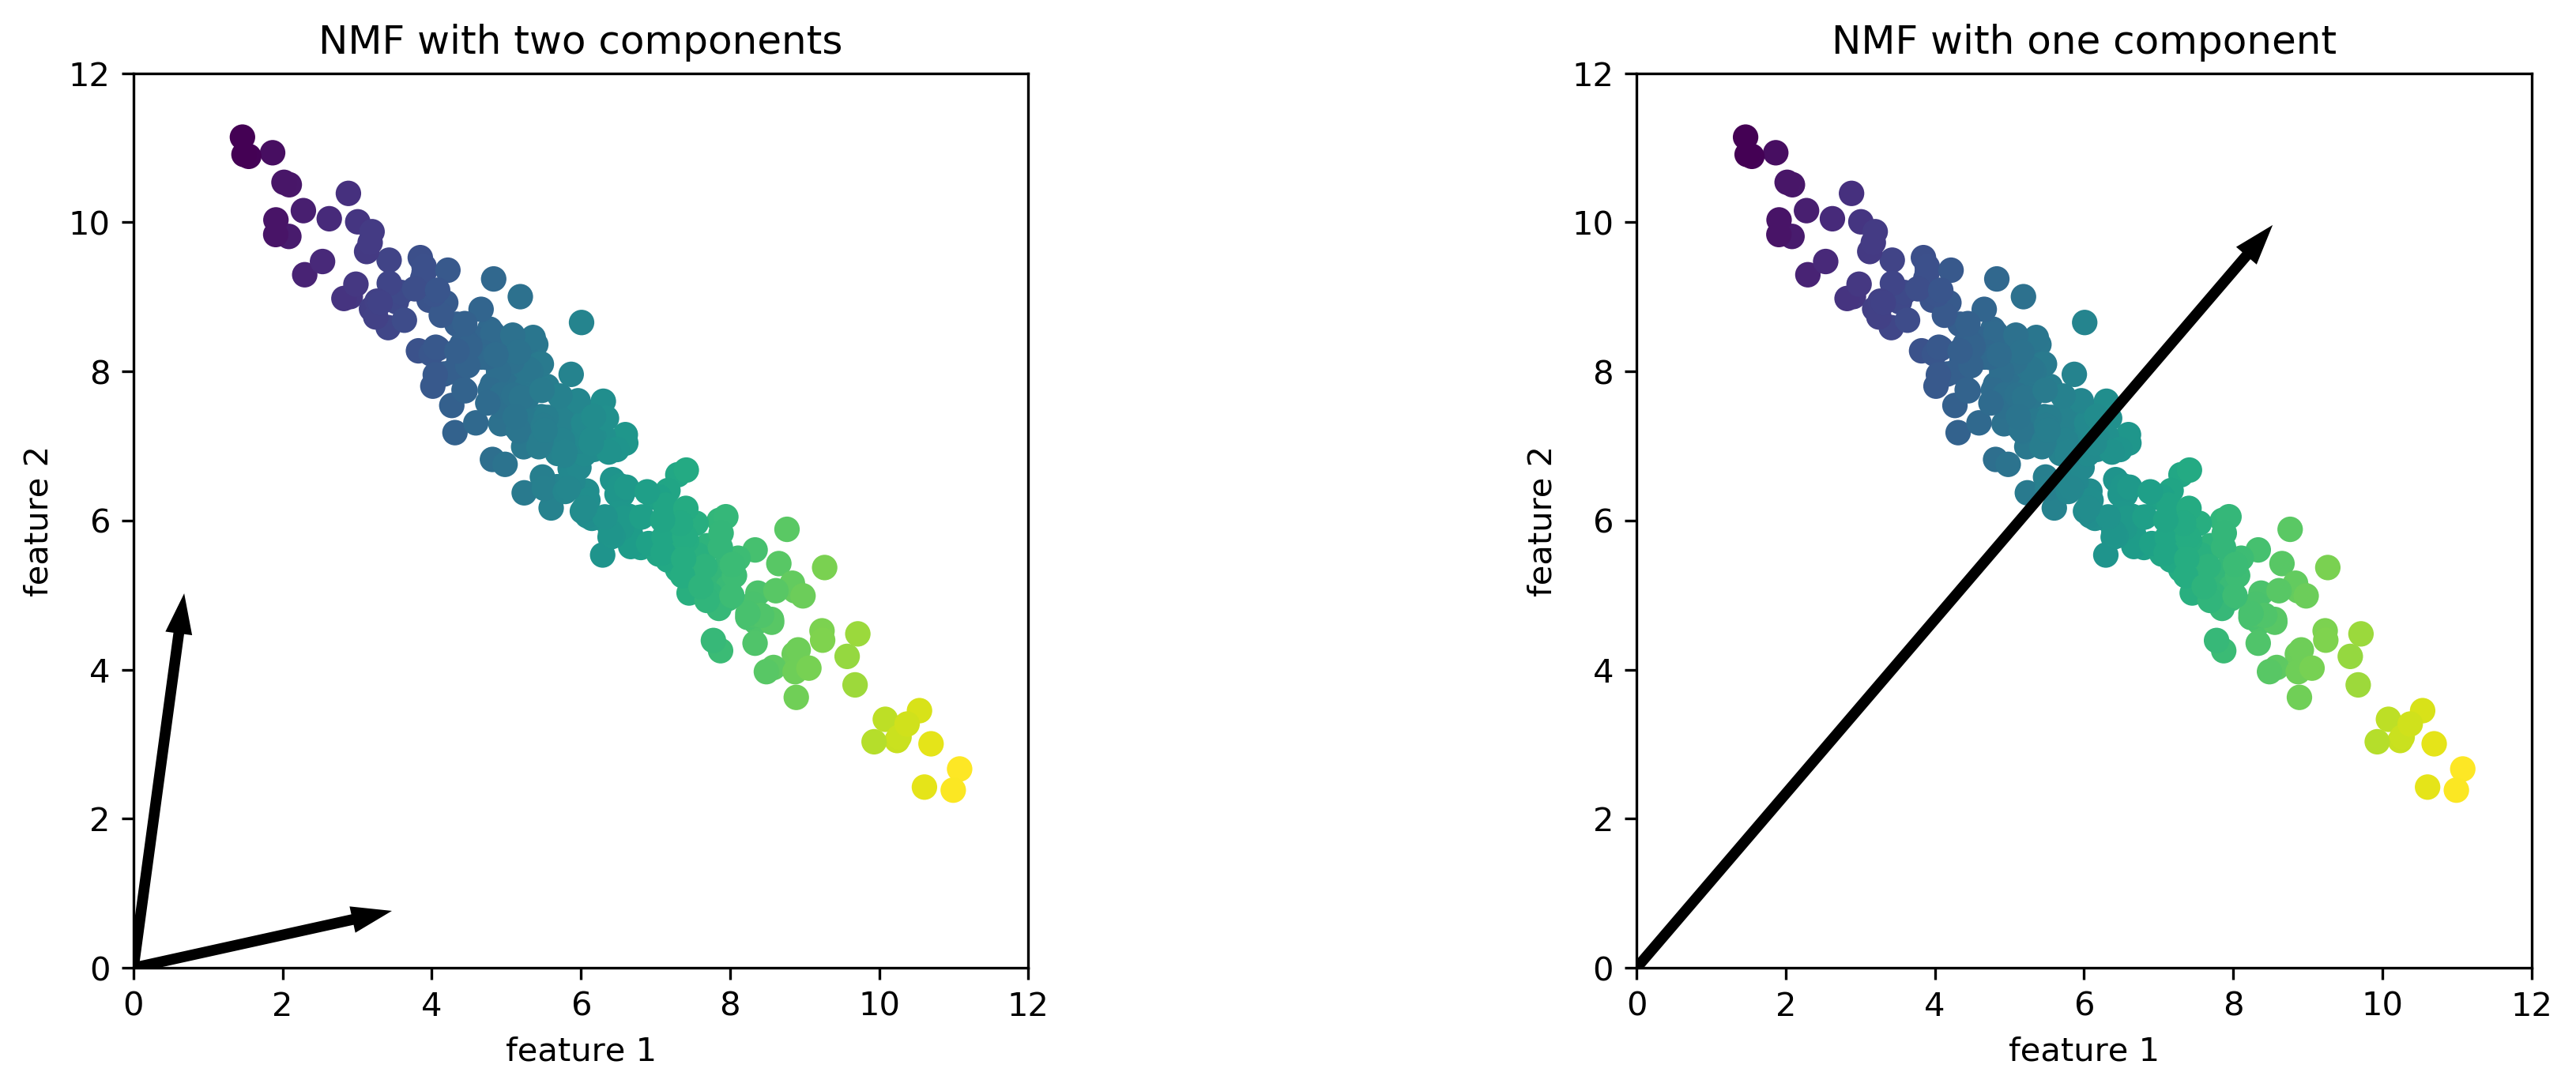

In [3]:
mglearn.plots.plot_nmf_illustration()

- NMF로 찾은 성분이 2개일 때(왼쪽) 1개일 때(오른쪽)
- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 ㅛㅍ현할 수 있는 평균으로 향하는 성분을 생성
    - PCA와는 반대로 성분 개수를 주리면 특정 방향이 제거되는 것 뿐만 아니라 전체 성분이 바뀜
    - NMF에서 성분은 특정 방식으로 정렬되어 있지 않아도 같은 것이 없음 즉, 동등하게 취급

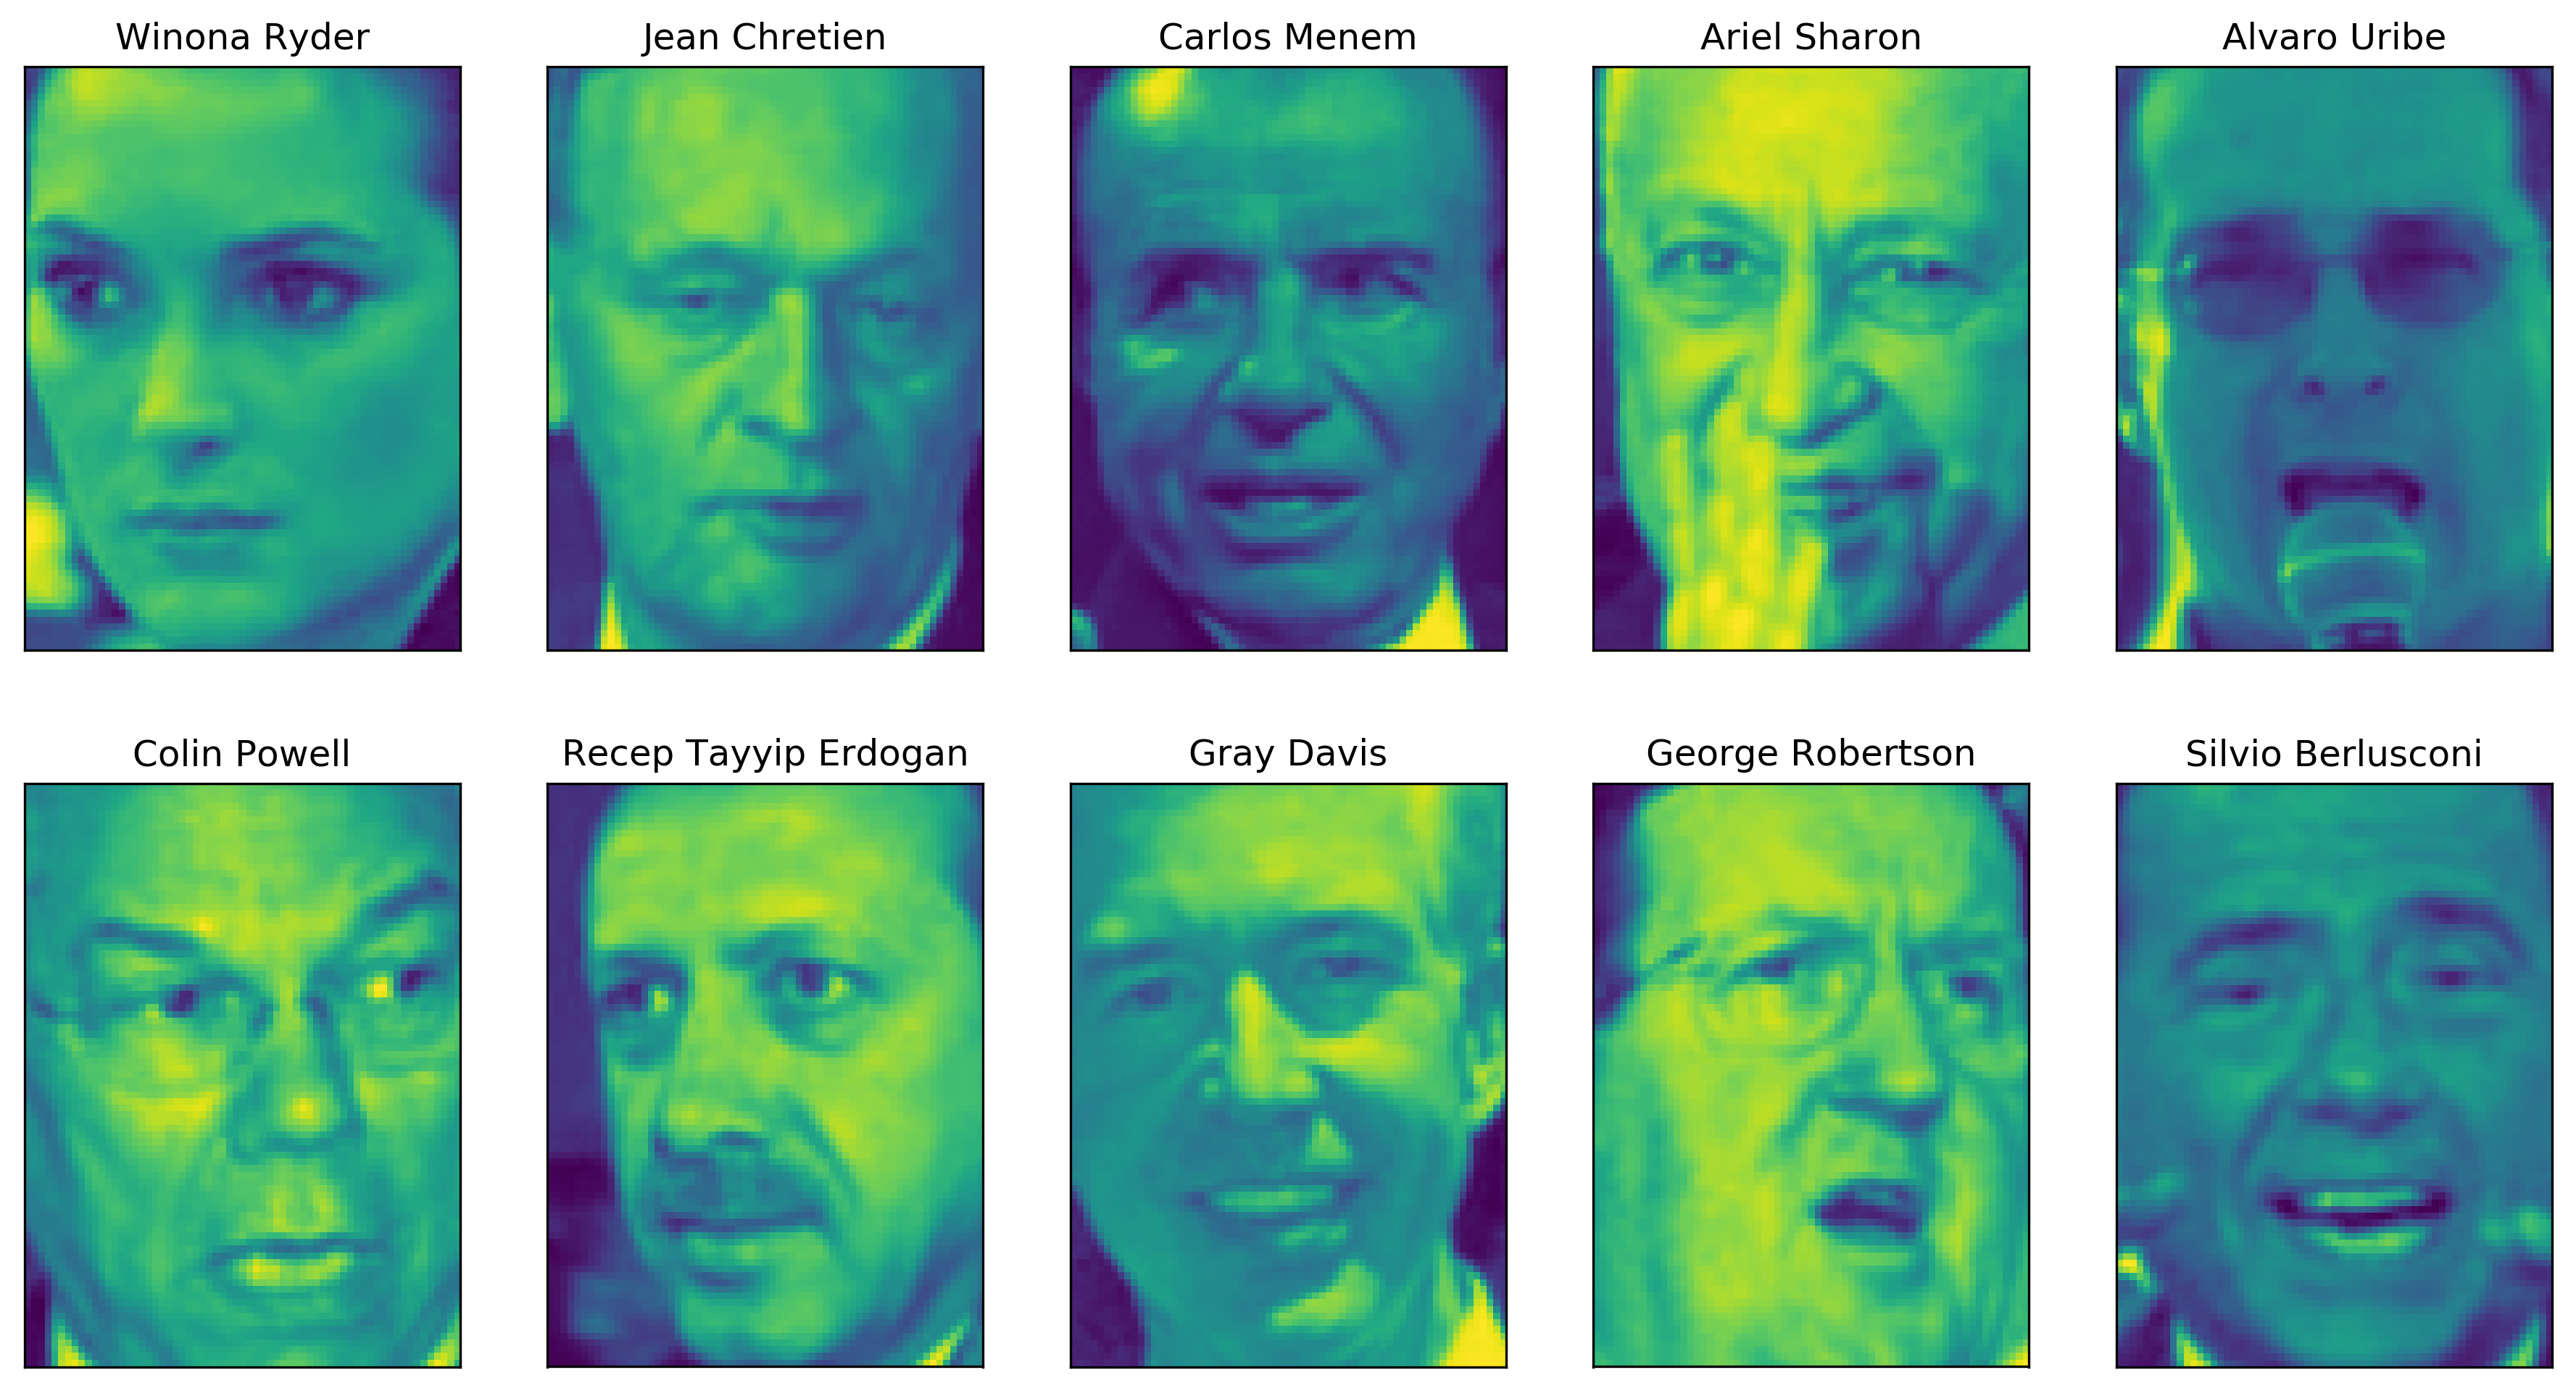

In [4]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
# MinMaxScaler를 적용하는 것과 흡사함
X_people = X_people / 255.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 619.7s, 10.3min


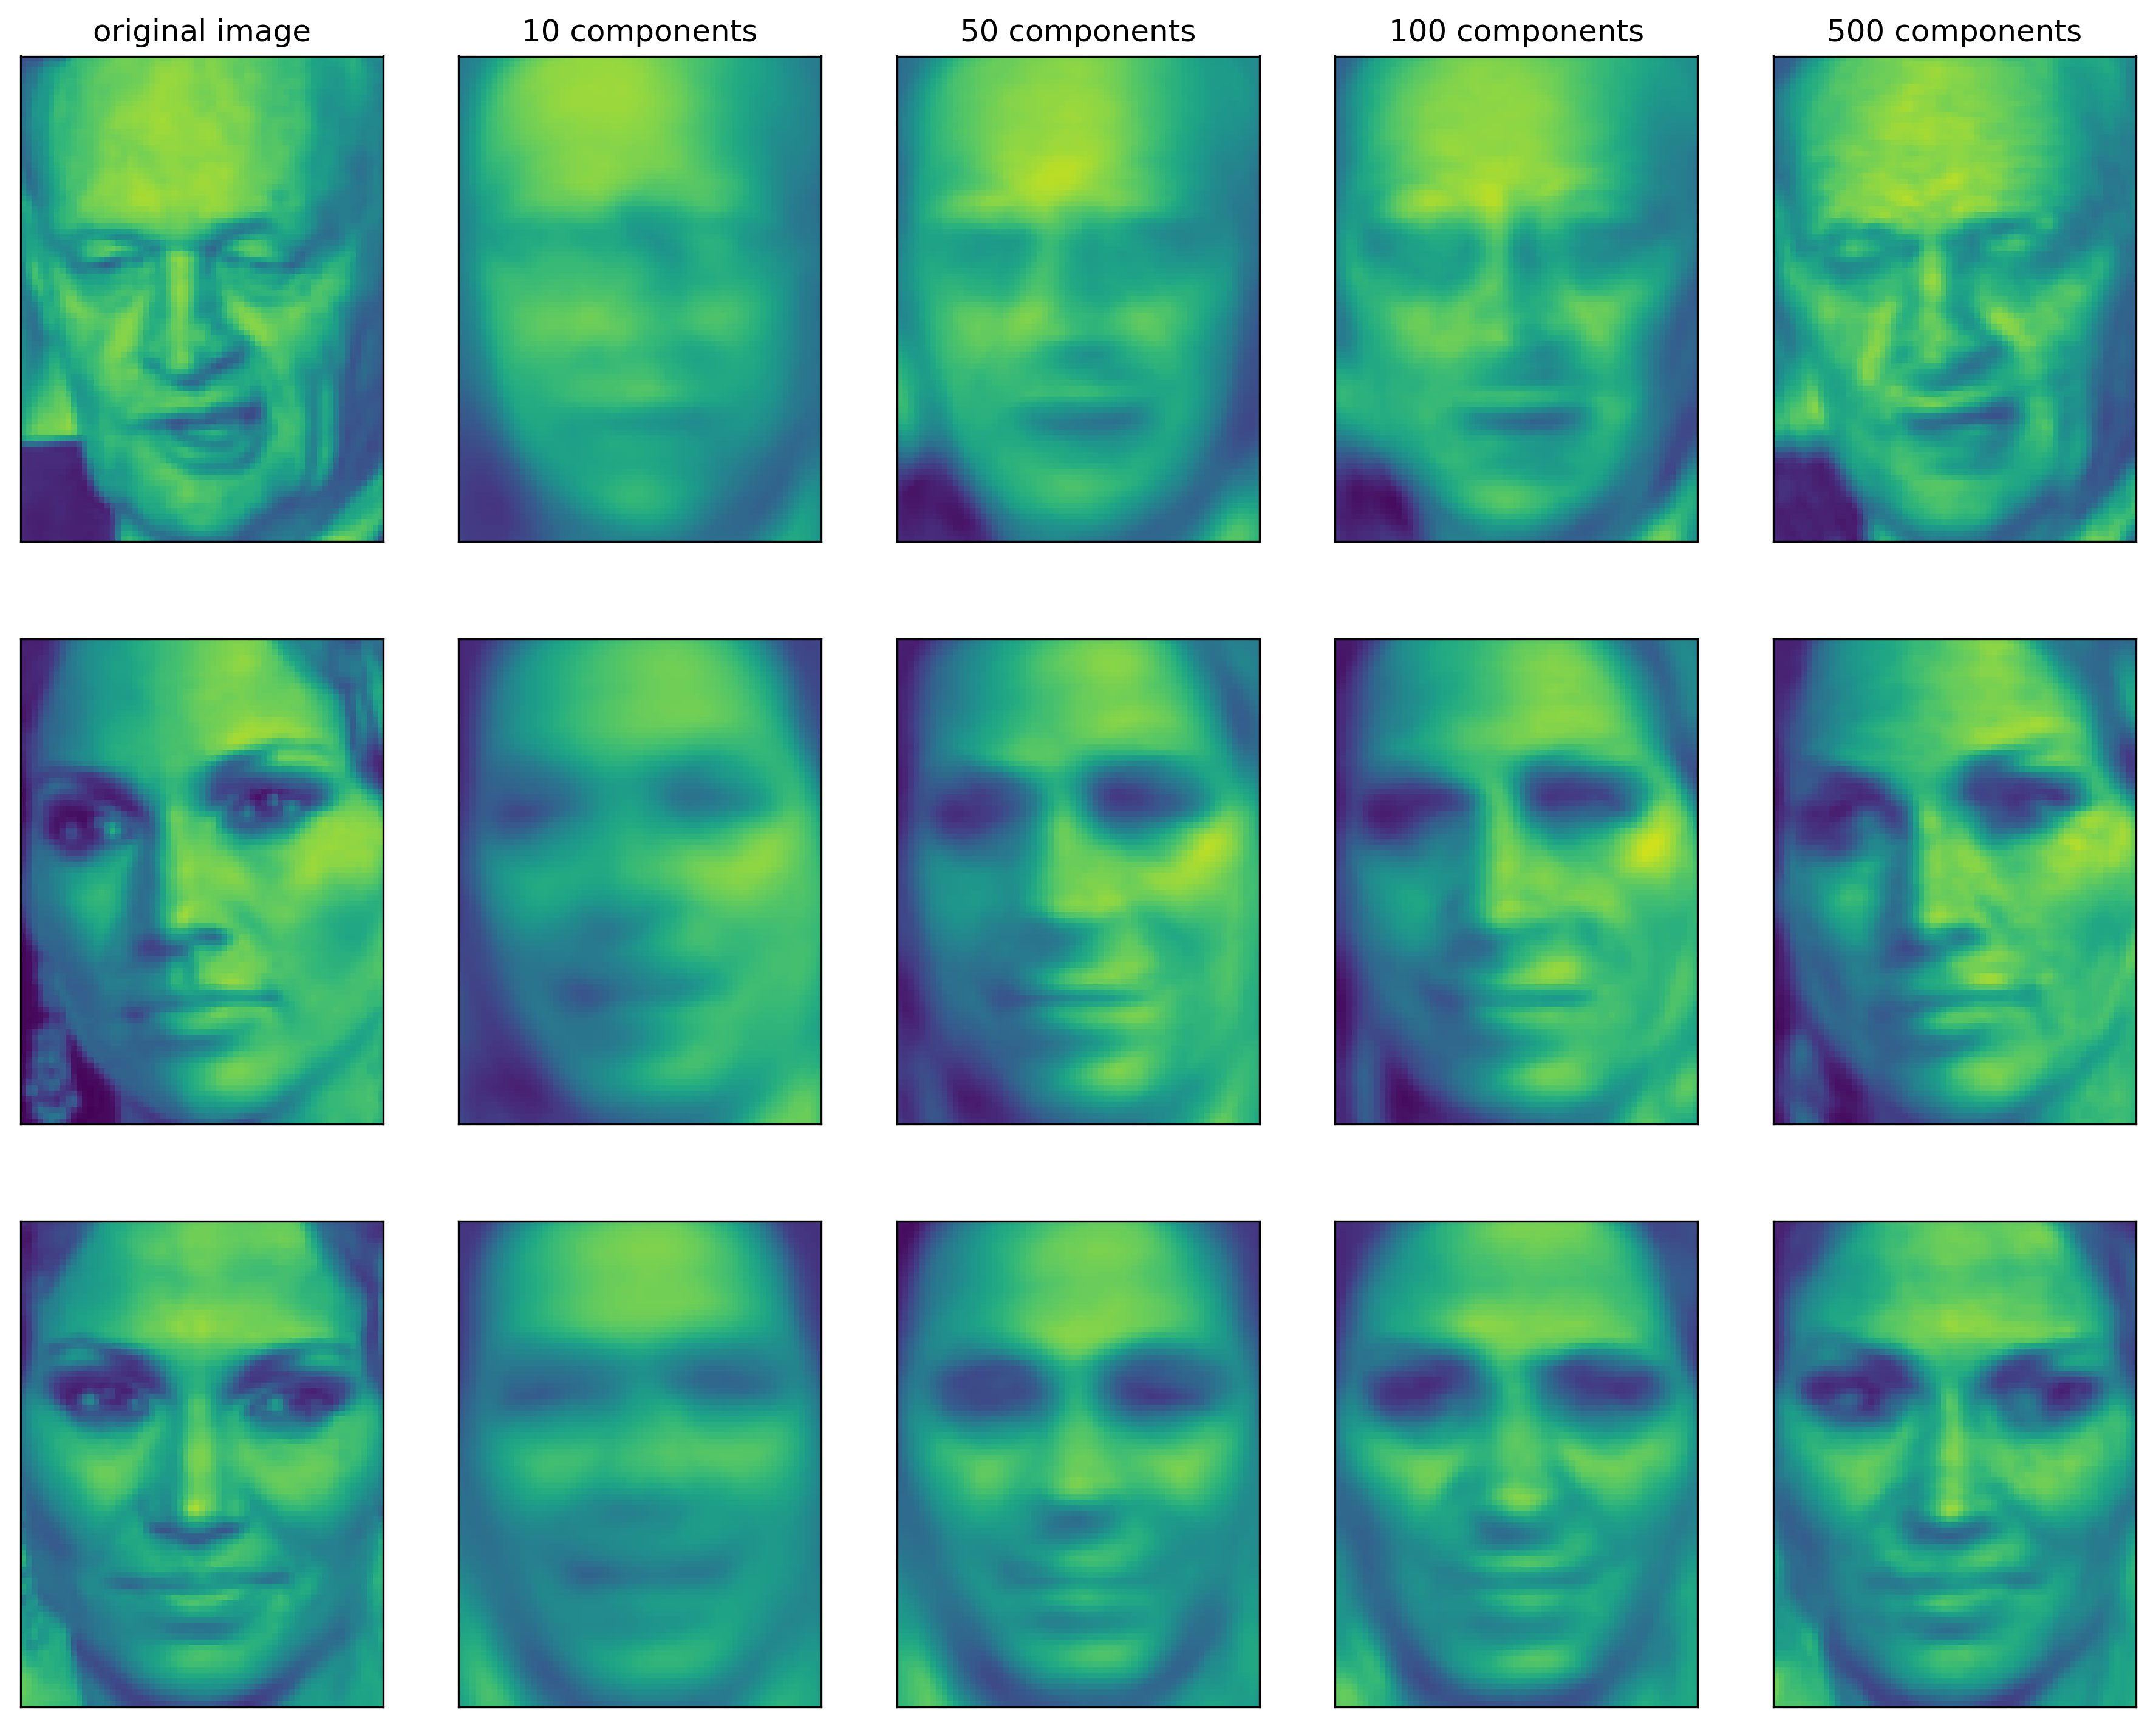

In [10]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

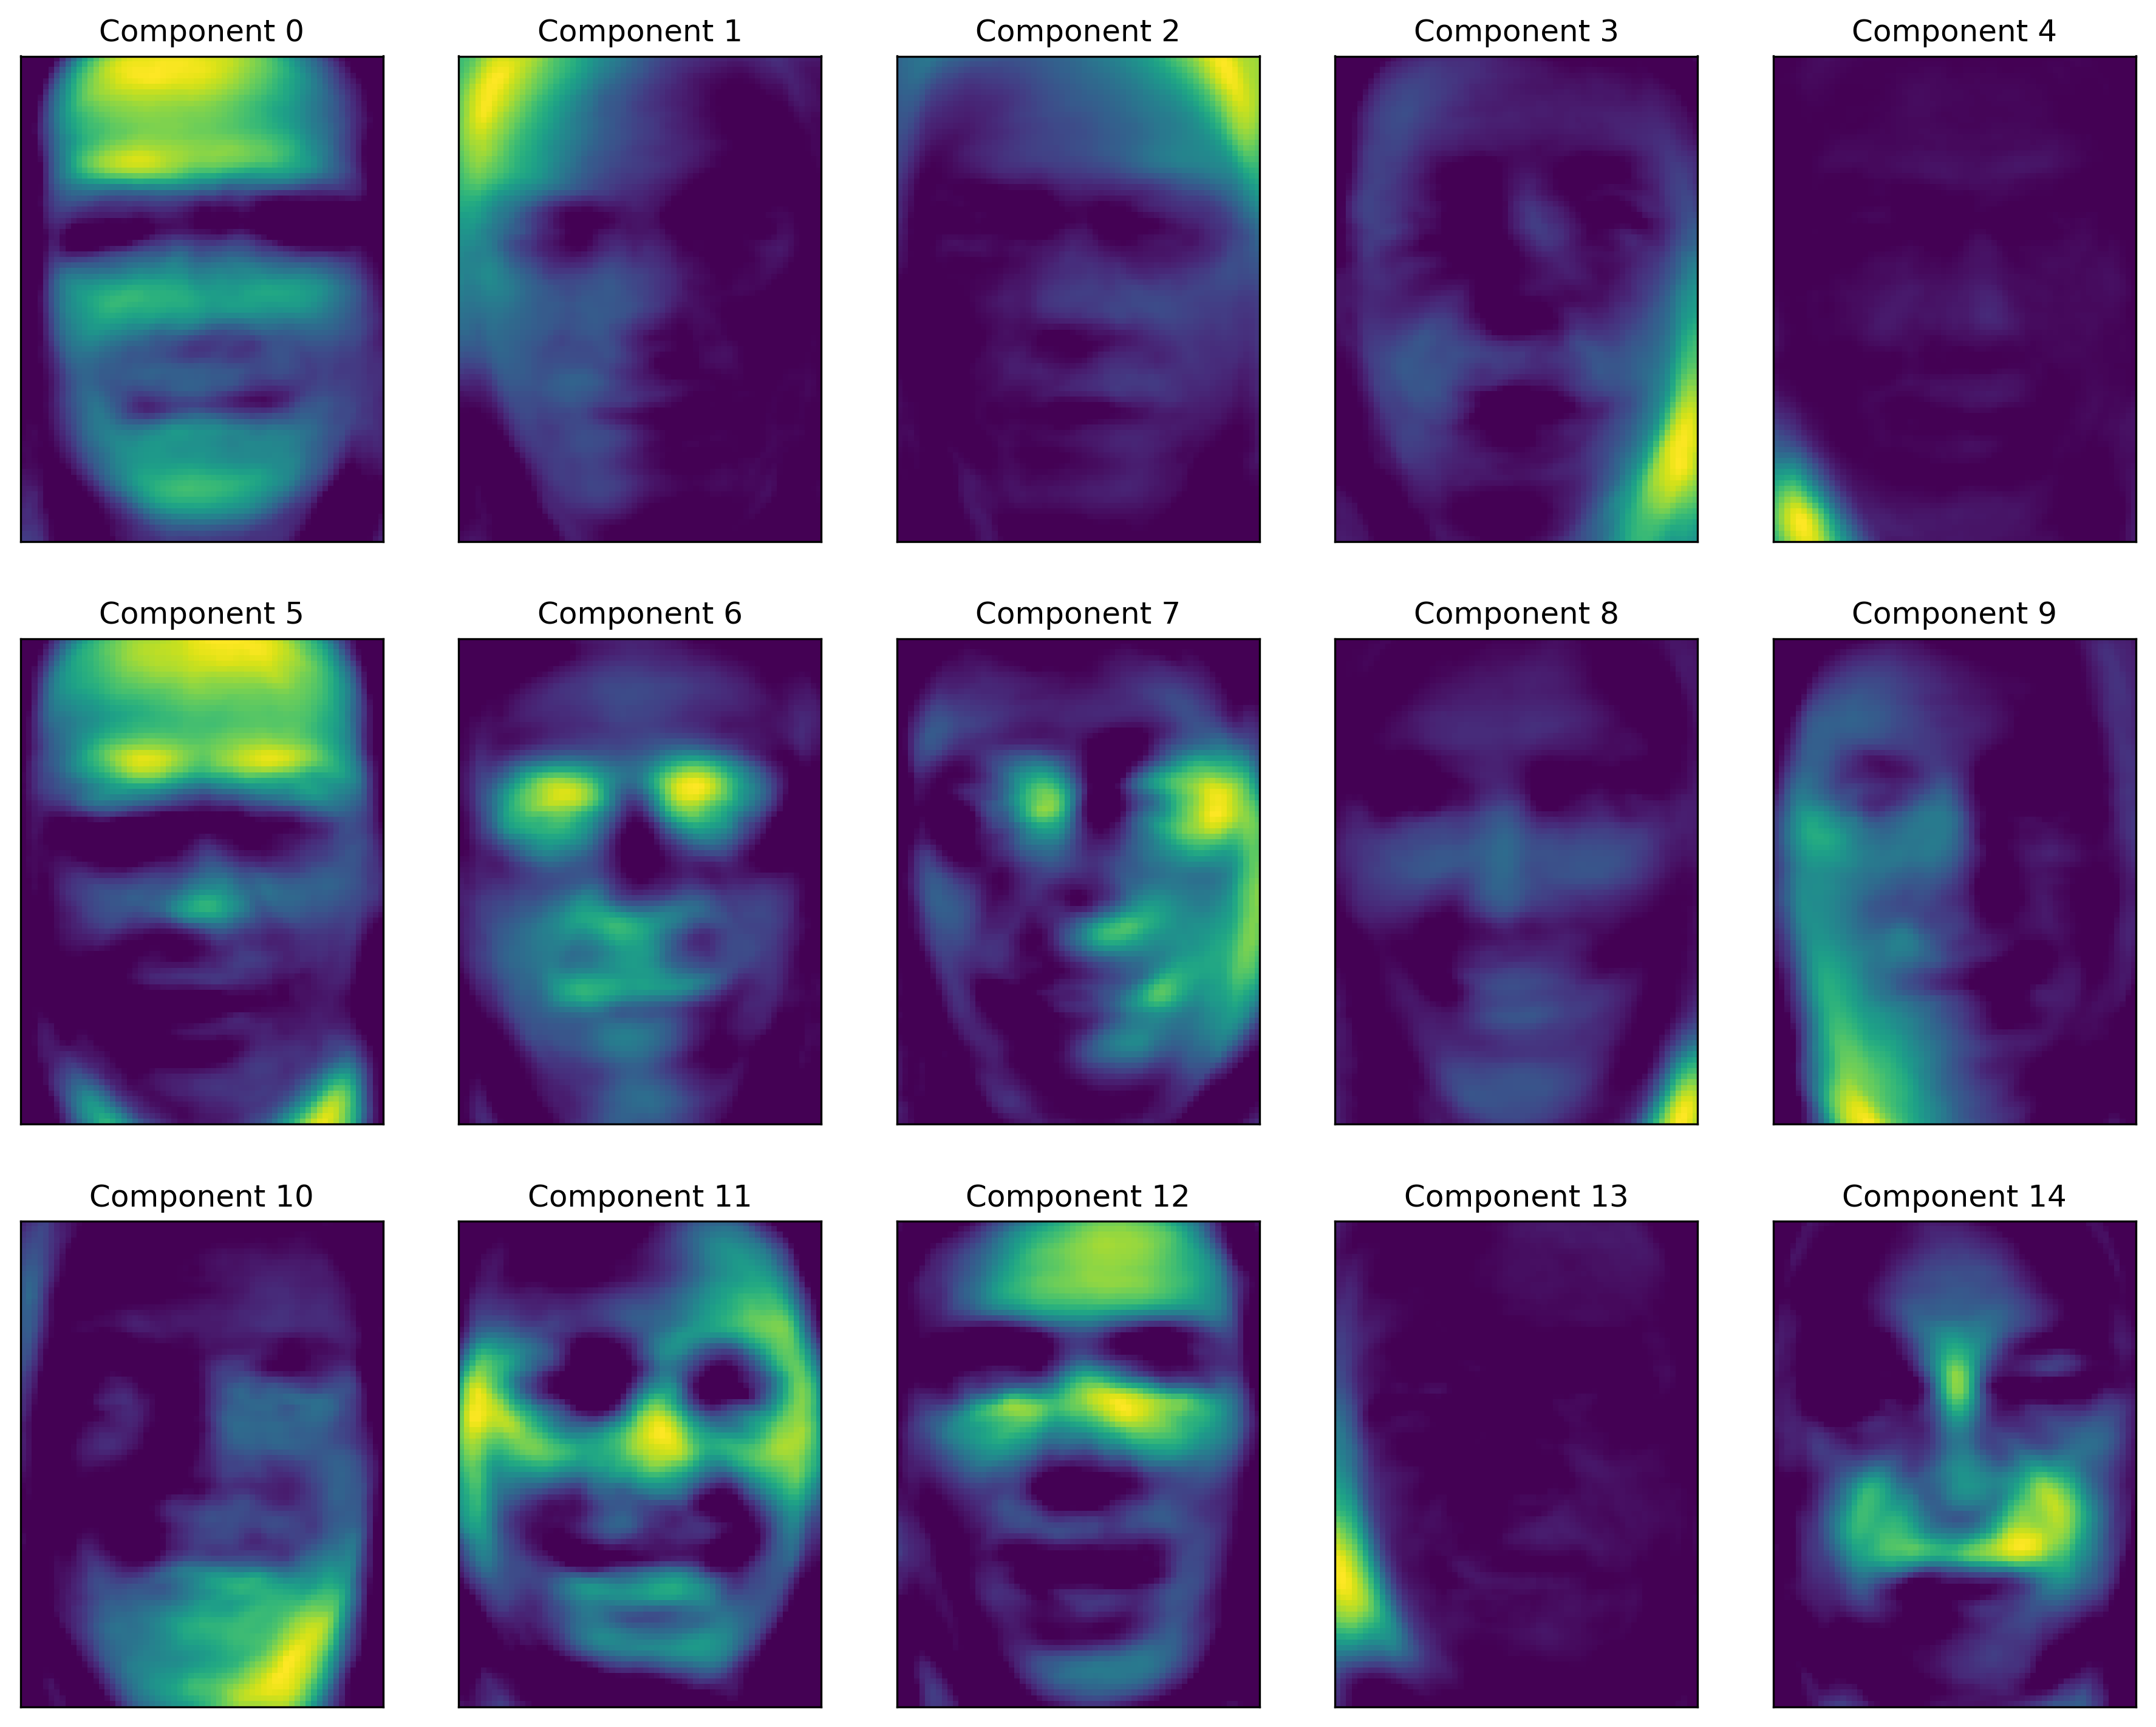

In [12]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Component {}".format(i))

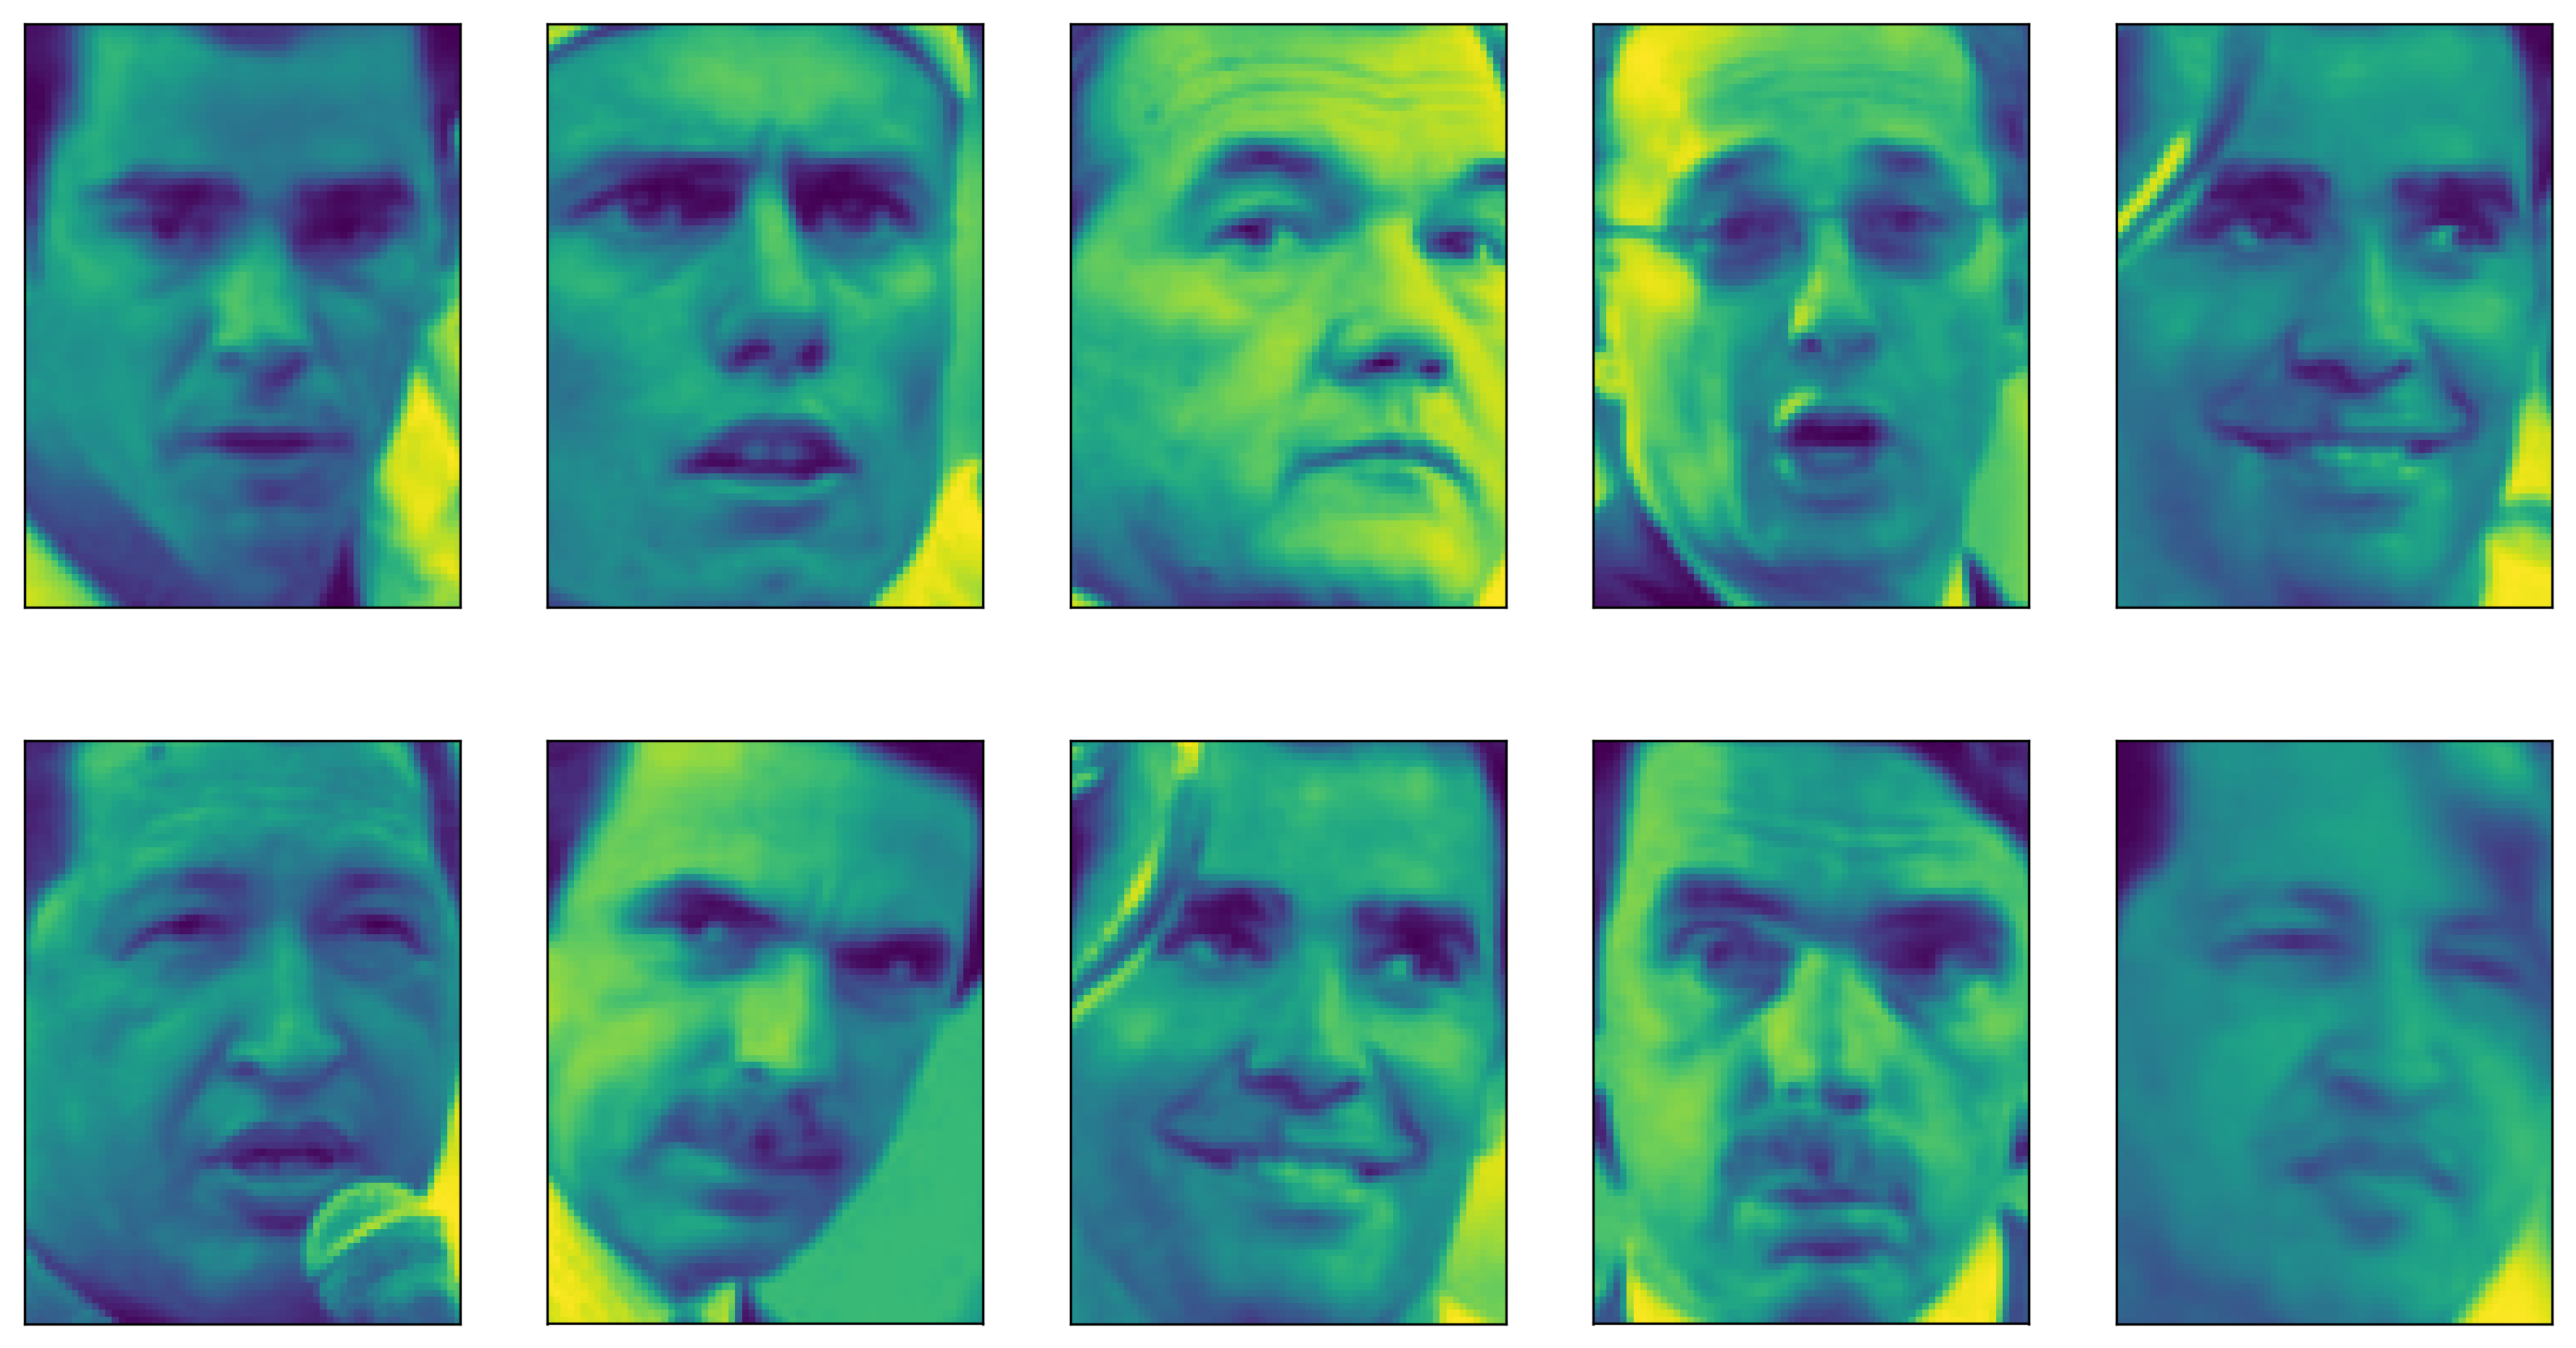

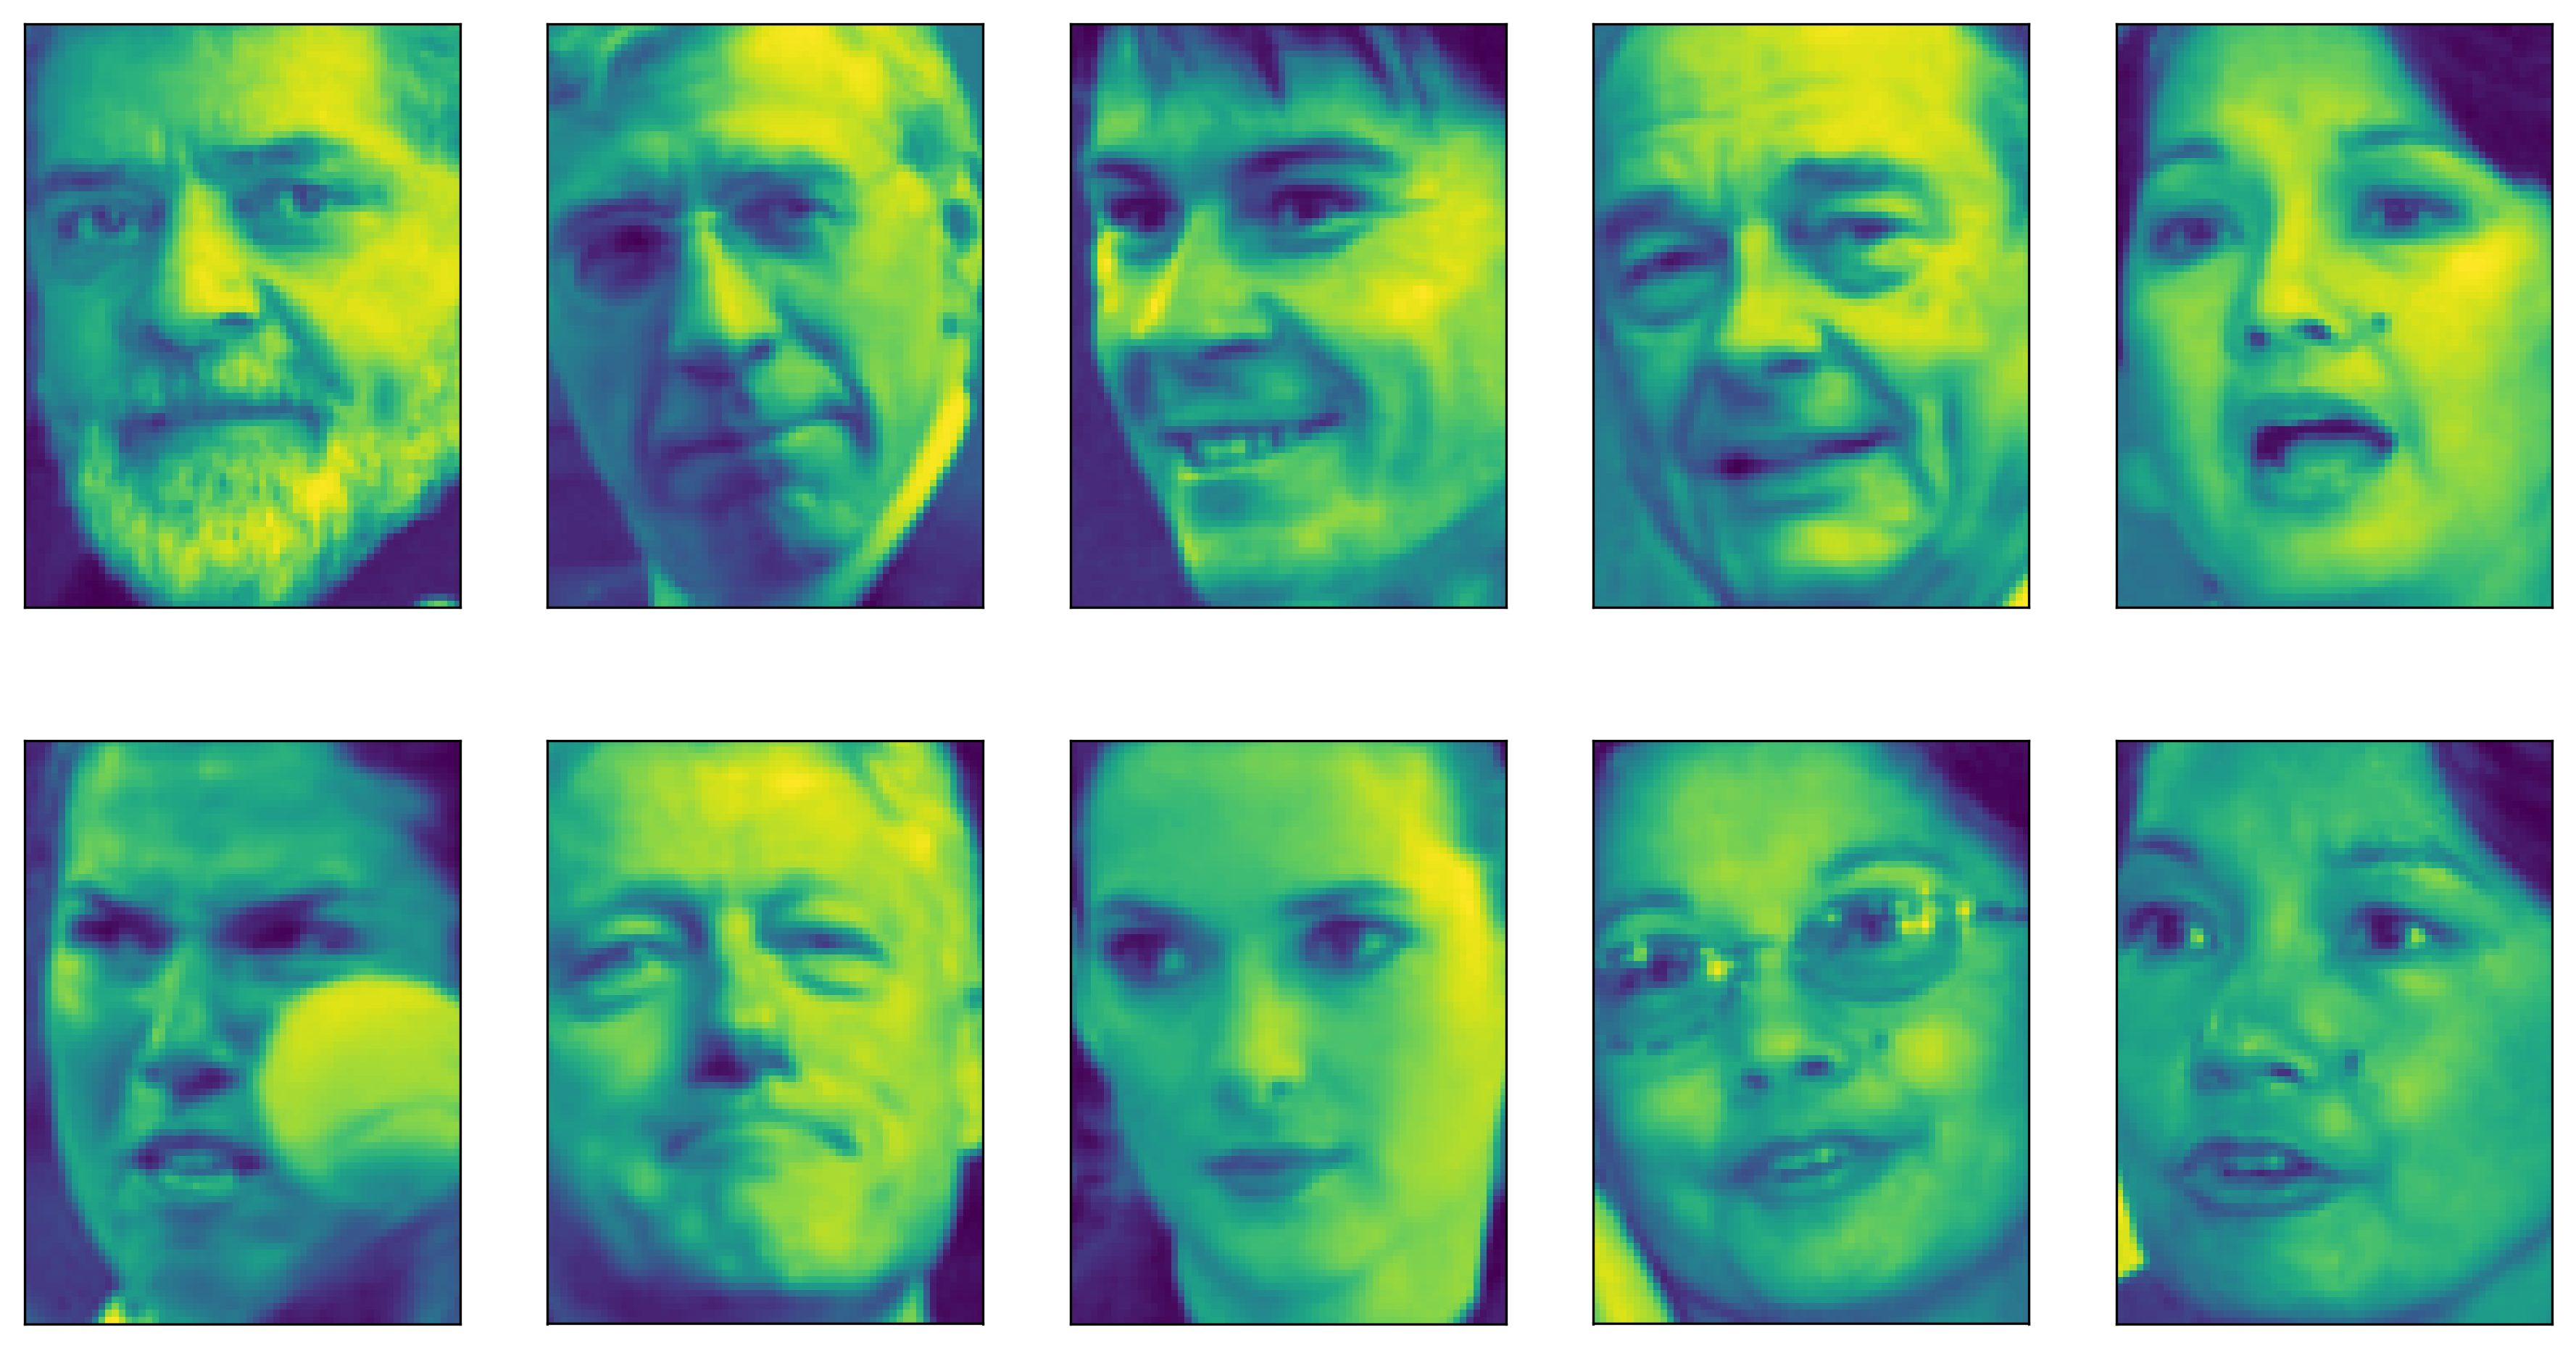

In [13]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- 성분 7에 대한 계수값이 큰 얼굴들은 왼쪽
- 서분 11에 대한 계수값이 큰 얼굴들은 오른쪽

Text(0,0.5,'Signal')

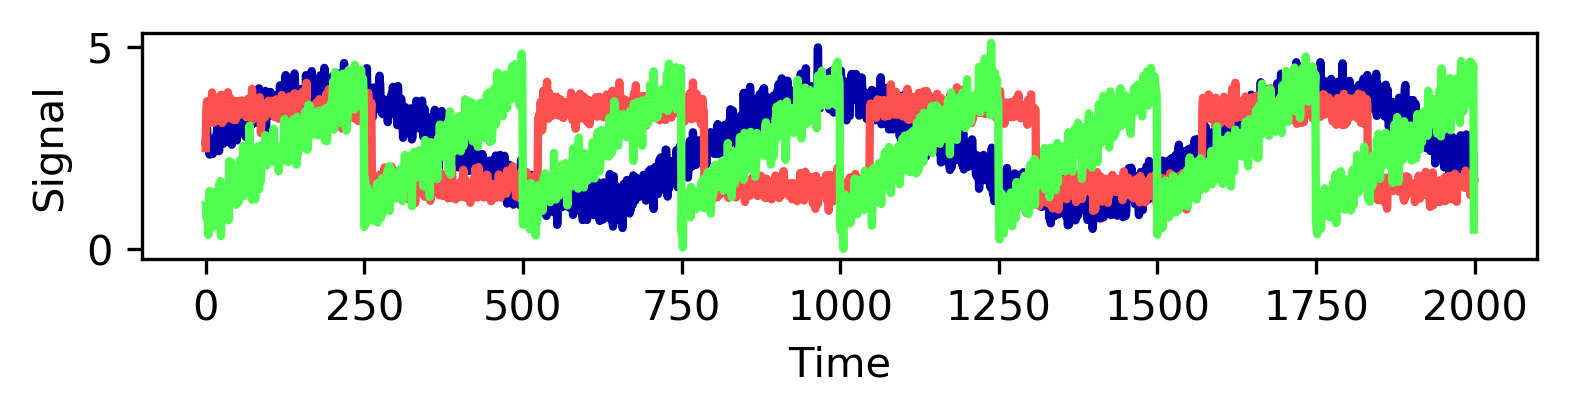

In [16]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [18]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


- NMF를 사용해 세게의 신호를 복원

In [19]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

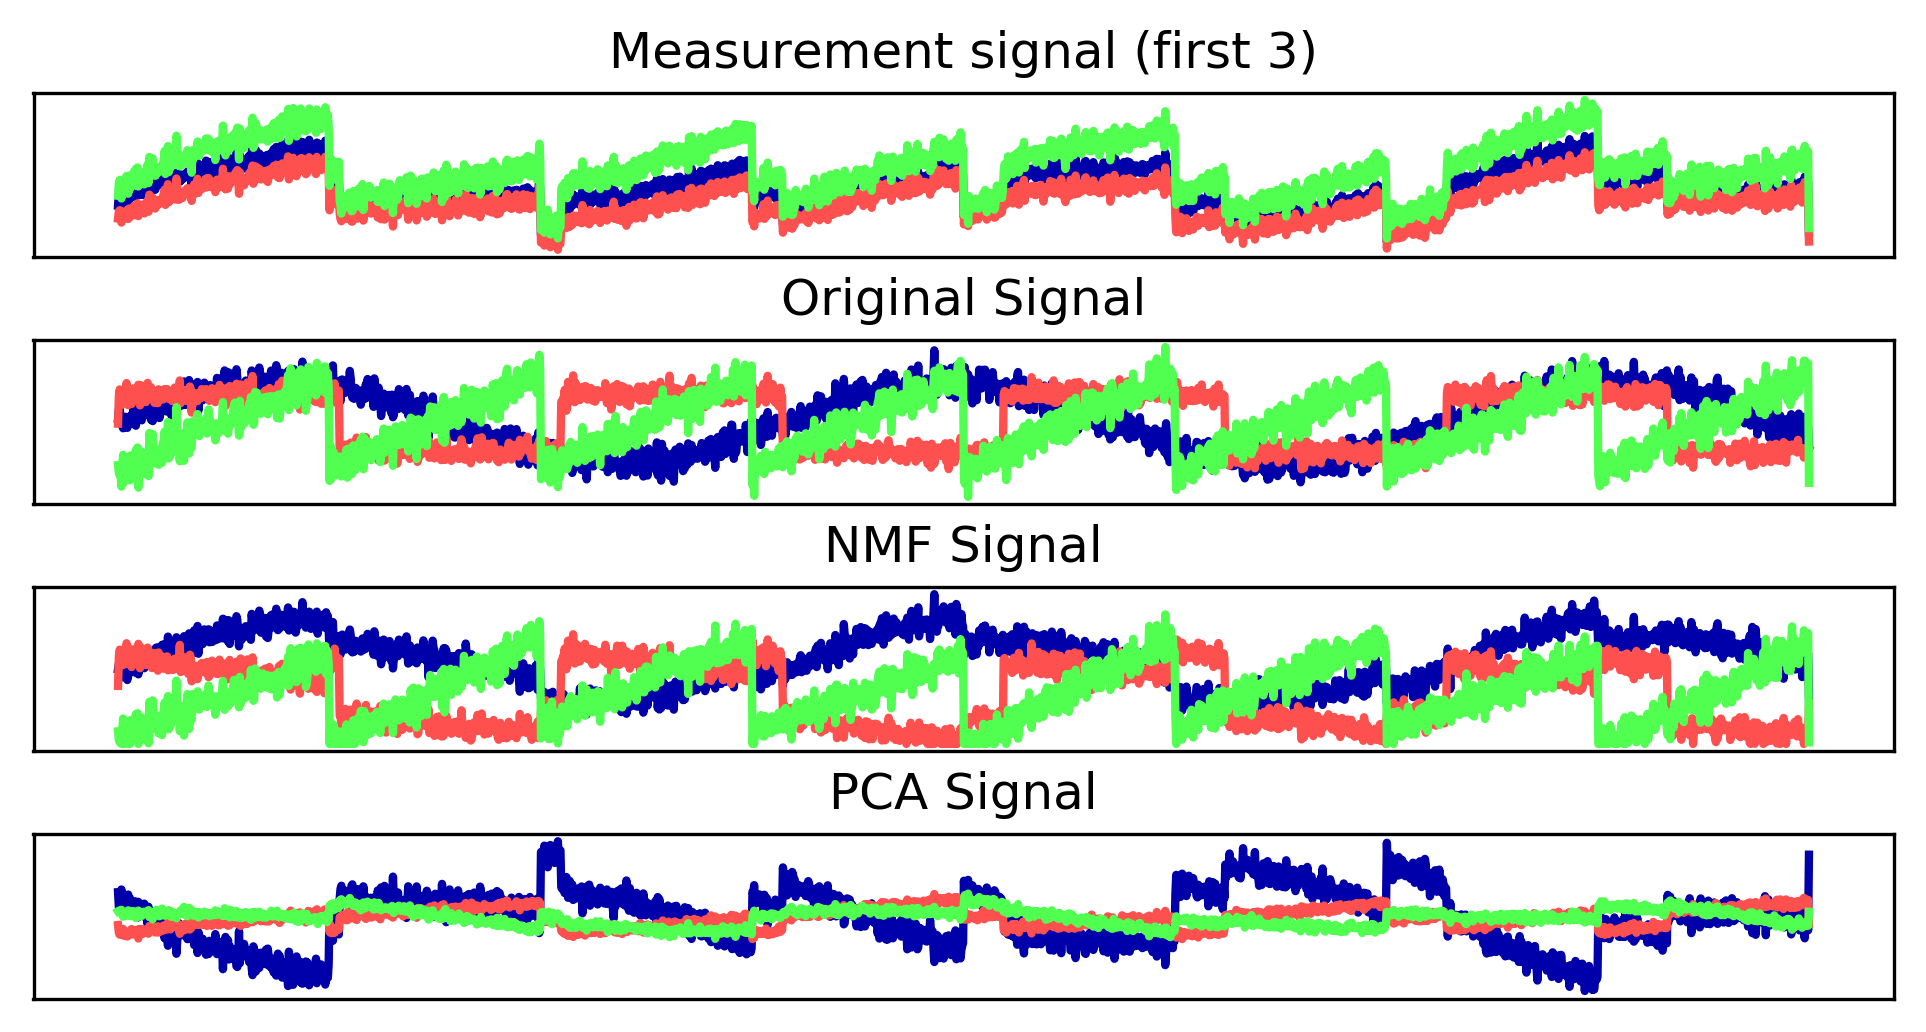

In [23]:
models = [X, S, S_, H]
names = ['Measurement signal (first 3)',
         'Original Signal', 
         'NMF Signal',
         'PCA Signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

- NMF 는 원본 신호를 잘 복원
- PCA 는 잘 복원하지 못함
    - 이 예에서는 우연일 뿐...